 ### Random Sample Imputation
 Random Sample Imputation it consists of taking random observations from the dataset and we use this observation to replace the nan values.<br>
When should it be used ?<br>
It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])

In [3]:
# Check the null values in the dataset 
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
# Check the % of the null values
(df.isnull().mean())*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
df['Age'].isnull().sum()

177

In [16]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [19]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)  
    
    df[variable+"_random"] = df[variable]  
    
    # It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    
    # pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample                                                
                                                   

In [18]:
median = df.Age.median()

In [20]:
impute_nan(df,"Age",median)

In [21]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

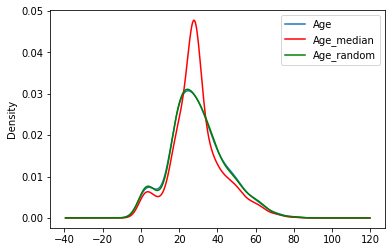

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde',ax= ax)
df['Age_median'].plot(kind = 'kde', ax=ax ,color = 'red')
df['Age_random'].plot(kind = 'kde', ax=ax ,color = 'green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

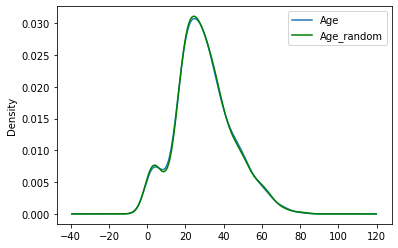

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde',ax= ax)
df['Age_random'].plot(kind = 'kde', ax=ax ,color = 'green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages : 
1. Easy to implement
2. There is less distortion in variance

#### Disadvantages :
1. Every situation randomness won't work

### Capturing NAN values with a new feature
It works well if data are missing not completely at random (MNAR)

In [30]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])

In [31]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
import numpy as np  
df['Age_Nan'] = np.where(df['Age'].isnull(),1,0)

In [36]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantages :
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages :
1. Creating Additional Features(Curse of    Dimentionality)

### End of Distribution Imputation 


In [39]:
df = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


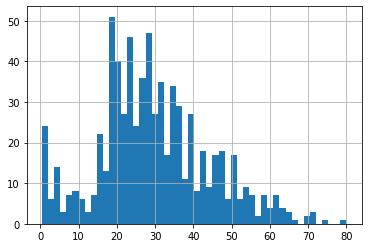

In [40]:
df.Age.hist(bins = 50)

In [46]:
# pick the data 3 std. away from the mean
extreme = df.Age.mean()+3*df.Age.std()

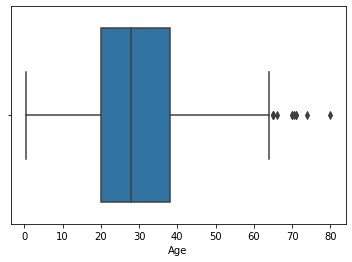

In [42]:
import seaborn as sns
sns.boxplot('Age',data = df)

In [48]:
def impute_nan_endOfDist(df,variable,median,extreme):
    df[variable+"_end_dist"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)
    

In [47]:
impute_nan_endOfDist(df,'Age',df.Age.median(),extreme)

In [49]:
df.head()

,Survived,Age,Fare,Age_end_dist
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


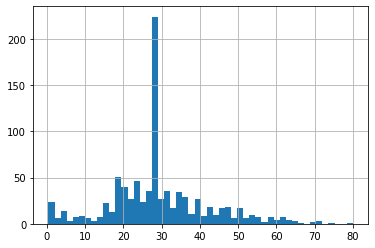

In [50]:
df['Age'].hist(bins = 50)

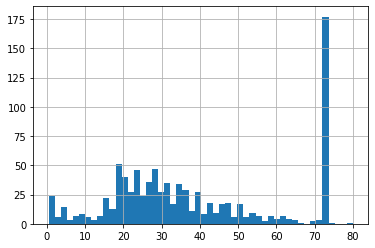

In [51]:
df.Age_end_dist.hist(bins = 50)

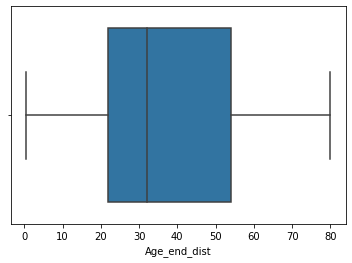

In [52]:
sns.boxplot('Age_end_dist',data = df)

#### Advantages : 
1. Easy to implement
2. Capture the importance of missingess if there is one

#### Disadvantages : 
1. Distorts the original distribution of the variable
2. If missingess is not important , it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big , it will mask true outliers in the distribution
4. If the number of NA is small , the replaced NA may be considered  an outlier and pre - processed in a subsequent feature engineering.

#### Arbitrary Value Imputation
It consist of replacing nan by an arbitrary value<br>
* This technique was derived from kaggle competition.

In [4]:
df = pd.read_csv("titanic.csv",usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
def impute_nan(df,variable):
    df[variable+"_zeros"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)
    

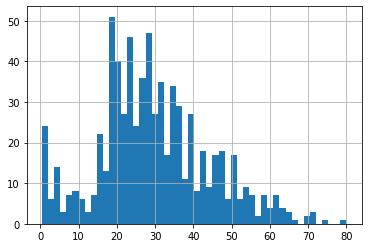

In [5]:
df.Age.hist(bins=50)

In [ ]:
### Arbitrary Values
##1. It should be more frequently present 

 
### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use